<a href="https://colab.research.google.com/github/ShinwooChoi/ESAA/blob/main/5_30_ESAA_YB_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch7 pg. 449~463

###3. 평균이동
**평균 이동(Mean Shift)의 개요**

✅ Mean Shift (평균 이동)의 개요
목적: 데이터 밀도가 가장 높은 지점(모드, 중심점)을 찾는 군집화 방법.

차이점: K-평균은 군집 개수 지정 필요, Mean Shift는 자동으로 중심점 탐색.

핵심 원리:

주변 데이터의 확률 밀도 함수 (PDF) 기반으로 가장 밀도 높은 방향으로 중심점 이동.

이를 위해 KDE(Kernel Density Estimation) 사용.

✅ KDE (커널 밀도 추정)
역할: 데이터가 분포된 모양을 추정하는 비모수적 방법.

핵심 요소:

커널 함수(Kernel Function): 데이터 점 주위에 부드러운 분포 생성.

대역폭 (Bandwidth, h): 분포의 부드러움 정도 결정.

✅ Bandwidth (대역폭)의 영향
작을수록: 분포가 세밀함 → 과적합(overfitting) 위험

클수록: 분포가 너무 평탄함 → 과소적합(underfitting) 위험

적절한 h 설정이 매우 중요: Mean Shift의 중심 탐색 정확도에 영향.

✅ Mean Shift 요약 알고리즘
각 데이터 점에서 주변 KDE 값 계산.

가장 밀도가 높은 방향으로 중심점 이동.

수렴할 때까지 반복.

최종 중심점들로 군집 결정.

✅ 실제 사용 예
sklearn의 MeanShift 클래스는 bandwidth를 자동 추정(estimate_bandwidth) 가능.

적절한 대역폭 설정이 알고리즘 성능의 핵심.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :', np.unique(cluster_labels))

cluster labels 유형 : [0 1 2 3 4 5]


In [2]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))


bandwidth 값: 1.816


In [4]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


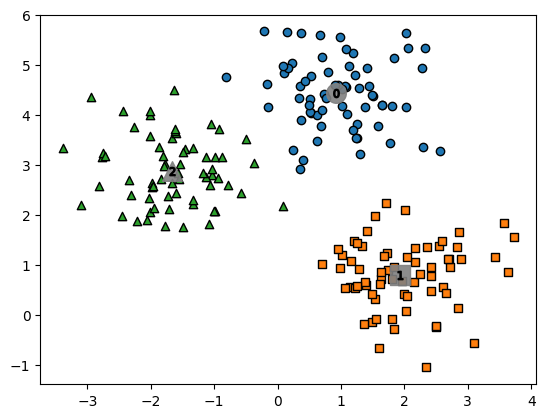

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [6]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


4 GMM(Gaussian Mixture Model)

###4. GMM(Gaussian Mixture Model)
**GMM(Gaussian Mixture Model) 소개**

✅ GMM (Gaussian Mixture Model) 개요
정의: GMM은 데이터가 여러 개의 **정규분포(Gaussian)**가 섞인 것이라고 가정하여 군집화를 수행하는 방식.

목적: 전체 데이터 분포를 각기 다른 정규분포의 혼합으로 모델링함으로써, 각 데이터가 어떤 분포에 속하는지를 추정함.

✅ 정규분포의 특징
평균(μ)을 중심으로 대칭적인 종 모양(Bell shape)의 분포.

표준편차(σ)에 따라 68.27%, 95.45%, 99.73%가 각각 ±1σ, ±2σ, ±3σ 내에 존재.

✅ GMM의 원리
데이터 전체 분포는 여러 개의 정규분포가 합쳐진 형태로 나타남.

각 데이터가 어떤 정규분포에 속하는지와

각 정규분포의 평균과 분산을 추정해야 함.

✅ 모수 추정 방법: EM 알고리즘
E-step (Expectation): 각 데이터가 어떤 정규분포에 속할 확률 계산.

M-step (Maximization): 이 확률을 바탕으로 각 정규분포의 평균과 분산 추정.

위 과정을 반복하여 수렴할 때까지 모델을 최적화.

✅ GMM의 장점
K-means보다 유연한 군집화 가능 (모양, 크기, 방향이 다른 군집도 표현 가능).

군집 수를 고정하지 않고 확률적으로 추정 가능.



In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


GMM과 K-평균의 비교

In [10]:
# visualize_cluster_plot 함수 정의
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            isNoise=True

        # 군집별로 다른 마커로 산점도 적용
        if isNoise:
            marker='.'
            isNoise=False
        else:
            marker=markers[label % len(markers)]

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=marker)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                        alpha=0.9, edgecolor='k', marker=marker)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='black',
                        edgecolor='k', marker='' % label)

    if iscenter:
        plt.title(clusterobj.__class__.__name__ + ' Clusters')
    else:
        plt.title('Data Clusters')
    plt.show()

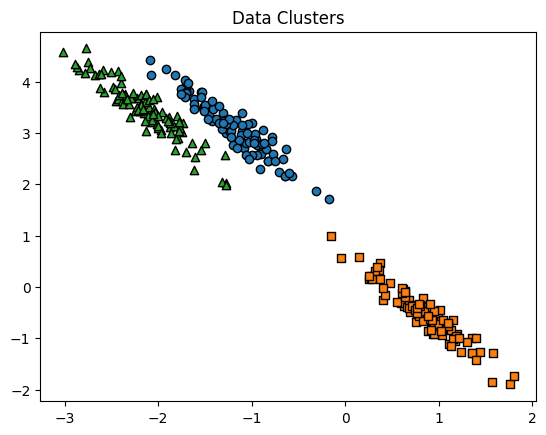

In [11]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타우너형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253299]]

x_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=x_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

<ipython-input-10-0bef7942e4e6>:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='black',


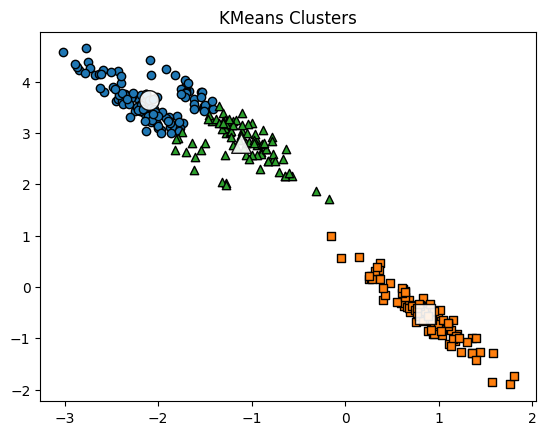

In [12]:
# 3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(x_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

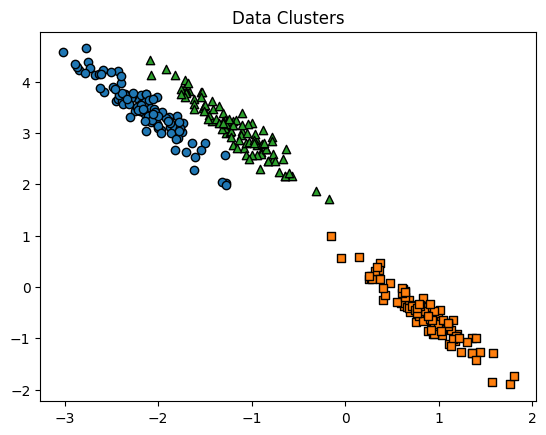

In [13]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(x_aniso).predict(x_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [14]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
